## Boundary-Value PDE with Finite Difference Method.

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.63542117e-06 -5.28337496e-06 ... -1.75172877e-06
  -8.64637824e-07  0.00000000e+00]
 [ 0.00000000e+00 -5.21433028e-06 -1.04244567e-05 ... -3.44347457e-06
  -1.70872578e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.71672338e-06 -3.41315542e-06 ... -1.24814613e-06
  -6.17798268e-07  0.00000000e+00]
 [ 0.00000000e+00 -8.55218640e-07 -1.68505994e-06 ... -6.17781516e-07
  -3.05748483e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
0.000990221541418728
152.0


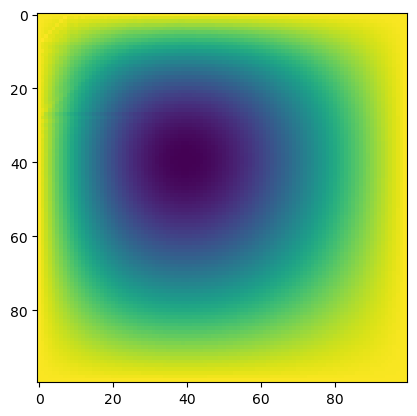

In [87]:
import numpy as np
import matplotlib.pyplot as plt
# import sys
np.set_printoptions(threshold=800)

M = 100
v = 1.
phi = np.zeros((M,M))
# phi[0,:] = 5.
# phi[M-1,:] = 5.
# phi[1:M-1,0] = 5.
# phi[1:M-1,M-1] = 5.
phi[20:M-20,20] = 1 
phi[20:M-20,80] = -1 
# phi[-20:M-20,20] = 0 
# phi[-20:M-20,80] = 0 


a = 1
tol = 10**(-3) 
k = 0.
delta = 1.
while(delta > tol):

    phiold = np.copy(phi)

    for i in range(1,M-1):
        for j in range(1,M-1):
            phi[i,j] =(1.9/4)*(phi[i+a,j] + phi[i-a,j] + phi[i,j+a] + phi[i,j-a])- 0.9*phi[i,j]

#     print('phiold is',phiold)
#     print('phinew is', phi)
    delta = np.linalg.norm(phi-phiold)
    k+=1
print(phi)
print(delta)
print(k)


plt.imshow(phi)


    

## The forward-time centered-space (FTCS)

The flat base of a container made of 1 cm thick stainless steel is initially
at a uniform temperature of $T_0 = 293 K$. The container is placed in
a bath of cold water at $T_{bath} = 273 K$ and is filled with hot water at
$T_{hot} = 323 K$. Calculate the temperature profile of the steel as a function
of distance $x$ from the hot side to the cold side (from 0 to 1 cm) and as
a function of time.

0.425
[273. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293. 293.
 293. 323.]


Text(0, 0.5, 'T[K]')

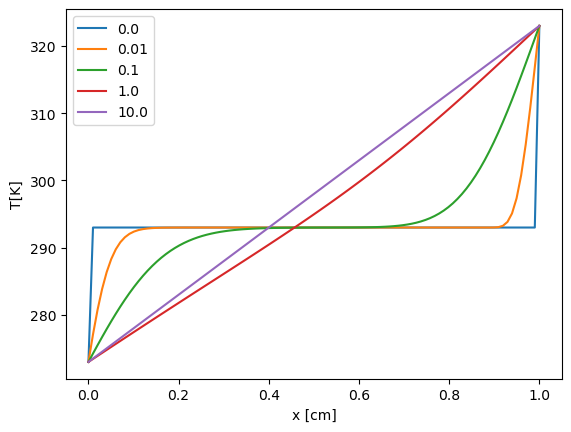

In [165]:
import numpy as np
import matplotlib.pyplot as plt

M = 100
T0 = 293
T_bath = 273
T_hot = 323
D = 4.25*10**(-2)
temp = np.zeros(M)
x = np.linspace(0,1,M)
# t = np.zeros(M)
a = (1-0)/M
h = 0.001
const = (h*D)/a**2
print(const)
time = [0.0,0.01,0.1,1.0,10.0]
########### representing the system ######################
temp[:1] = T_bath
temp[M-1:] = T_hot
temp[1:M-1] = T0
print(temp)
#################################################



############### FTCS implimentation ###################

def Temperature(time):
    t = 0.
    while(t < time):

        for i in range(1,M-1):
#             print(const)
            temp[i] += const*(temp[i+1]+temp[i-1]-2*temp[i])
    
        t+=h

    return(temp)
    
    
label = []    
for i in range(len(time)):
    plt.plot(x,Temperature(time[i]))
    
    label.append(time[i])
plt.legend(label)
plt.xlabel('x [cm]')
plt.ylabel('T[K]')


In [79]:
phi = np.zeros((10,10))
phi[2:M-2,2] = 1 
phi[2:M-2,8] = -1 
phi[-2:M-2,2] = 0 
phi[-3:M-2,8] = 0 
print(phi)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
